In [29]:
import os
from PIL import Image, ImageMath
import matplotlib.pyplot as plt
import numpy as np

def lsb_encoder(copyright_image, original_image):
    # 0: 将image类型转化为numpy数组
    original_image = np.array(original_image)
    copyright_image = np.array(copyright_image)
    # 1: 确保输入图像为8bits无符号整型
    original_image = original_image.astype(np.uint8)
    copyright_image = copyright_image.astype(np.uint8)
    
    # 2: 对original图像和copyright图像备份，不能在原图上更改
    watermark = original_image.copy() 
    copyright = copyright_image.copy() 
    
    # 3：将copyright二值化，使其仅含0和1，用1bit表示
    copyright[copyright<200] = 1
    copyright[copyright>=200] = 0

    # 4：将watermark的最后1bit的R、G、B全部置零
    #     也可以仅仅对R通道置零
    for i in range(0, watermark.shape[0]):
        for j in range(0, watermark.shape[1]):
            watermark[i, j , :] = (watermark[i, j, :]//2)*2
            
    for i in range(0, copyright.shape[0]):
        for j in range(0, copyright.shape[1]):
            # 5：将用1bit表示的二值化的水印信息
            #   添加到watermark最后1bit上
            watermark[i, j, 0] = watermark[i, j, 0] + copyright[i, j, 0]
        
    return watermark

def lsb_decoder(watermark_image):
    watermark_image = watermark_image.astype(np.uint8)
    
    return (watermark_image % 2) * 255

path = os.path.join("/root/notebook/")
original_image = Image.open(path + "lena.bmp")
copyright_image = Image.open(path + "copyright_lsb.png")
en_im = lsb_encoder(copyright_image, original_image) # 嵌入版权信息后的图片
de_im = lsb_decoder(en_im) # 提取版权信息


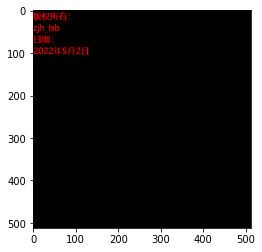

In [34]:
plt.imshow(de_im)